In [2]:
import pandas as pd
import numpy as np


In [3]:
df_master = pd.read_csv("patient_persona_feature_matrix.csv")

In [4]:
df_master.shape

(116, 282)

In [5]:
df_master

,PATIENT,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,ALIVE,MARITAL_D,MARITAL_M,MARITAL_S,MARITAL_W,...,a735bf55-83e9-331a-899d-a82a60b9f60c,b046940f-1664-3047-bca7-dfa76be352a4,d18ef2e6-ef40-324c-be54-34a5ee865625,d31fccc3-1767-390d-966a-22a5156f4219,df166300-5a78-3502-a46a-832842197811,e03e23c9-4df1-3eb6-a62d-f70f02301496,PLAN_OWNERSHIP_Guardian,PLAN_OWNERSHIP_Self,PLAN_OWNERSHIP_Spouse,PLAN_OWNERSHIP_Unknown
0,34a210f9-5ce1-ad63-790f-e404455e3e18,76578.32,15866.26,71625,32,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,146375.89,544097.84,542941,38,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,b1f7b5a9-5cf5-6050-b23c-81027f53bdfd,173374.13,476542.11,886745,36,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1f2aa6c9-41bd-aa05-9da3-e557d8949816,76375.47,647647.36,35850,32,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,80e114d1-013b-b546-7aba-17eb360dde04,135954.44,262321.29,149942,26,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,8d62a79e-a134-1cad-9c9f-4e39c17473ea,122465.26,62762.41,107998,53,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
112,5c0279c6-73ab-f684-a59f-196c3f7257e6,101194.22,52516.31,806060,49,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
113,0bab50a6-9f26-b095-a651-5704e621d436,378336.59,494278.79,84675,46,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
114,bee78cc3-6072-13da-a480-59cb9e56ae53,681325.33,512889.57,43634,101,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Safely drop if it exists
if 'index' in df_master.columns:
    df_master = df_master.drop(columns=['index'])

print(f"Shape after dropping 'index': {df_master.shape}")


Shape after dropping 'index': (116, 281)


In [7]:
df_master.shape

(116, 281)

In [8]:
from sklearn.preprocessing import StandardScaler

# Step 1: Drop PATIENT column for scaling
X = df_master.drop(columns=['PATIENT']).copy()

# Step 2: Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of Scaled Data: {X_scaled.shape}")


Shape of Scaled Data: (116, 280)


In [9]:
from sklearn.decomposition import PCA

# Step 2.1: Initialize PCA (no n_components yet)
pca = PCA()

# Fit PCA on scaled data
pca.fit(X_scaled)


PCA()

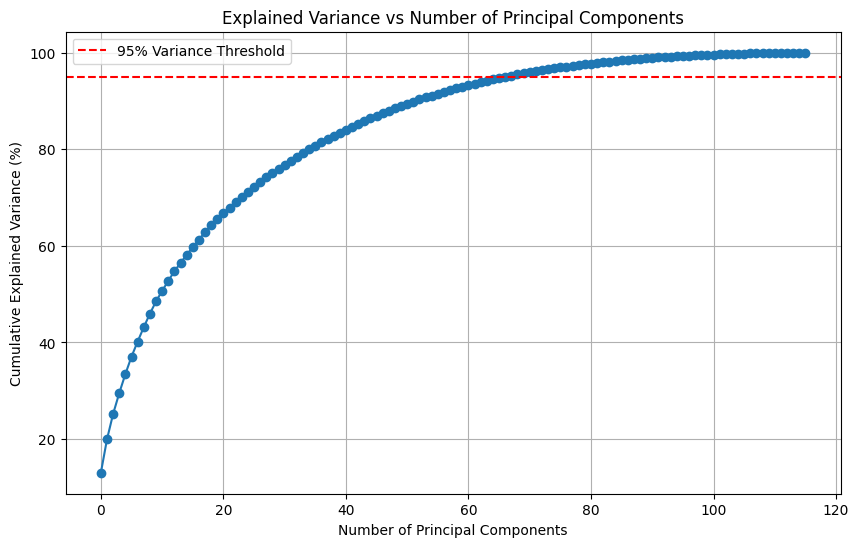

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Step 2.2: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs Number of Principal Components')
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Step 2.3: How many components for 95% variance?
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cum_var >= 0.95) + 1

print(f"✅ Number of components to retain 95% variance: {n_components_95}")


✅ Number of components to retain 95% variance: 67


In [12]:
# Step 2.4: Refit PCA with n_components_95
pca_final = PCA(n_components=n_components_95)
X_pca = pca_final.fit_transform(X_scaled)

print(f"Shape after PCA: {X_pca.shape}")  # Should be (116, n_components_95)


Shape after PCA: (116, 67)


In [13]:
# Step 1: Get PCA Components Matrix
# pca_final.components_: shape (67, 280) — each row is a PC, each column is an original feature
pca_components = pca_final.components_

# Step 2: Feature importance = sum of absolute loadings across all PCs
import numpy as np

# Sum of absolute loadings across all PCs
feature_importance = np.sum(np.abs(pca_components), axis=0)

# Step 3: Map back to feature names
feature_names = df_master.drop(columns=['PATIENT']).columns  # 280 features
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Step 4: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display Top 20 most important features
feature_importance_df.head(20)


,feature,importance
273,d31fccc3-1767-390d-966a-22a5156f4219,4.529783
70,Unhealthy alcohol drinking behavior (finding),4.489059
144,Amoxicillin 250,4.432130
55,Only received primary school education (finding),4.370002
151,tramadol hydrochloride,4.338479
121,MCHC [Mass/volume] by Automated count,4.311382
42,Housing unsatisfactory (finding),4.271619
119,Leukocytes [#/volume] in Blood by Automated count,4.238465
120,MCH [Entitic mass] by Automated count,4.234029
72,Viral sinusitis (disorder),4.229369


In [14]:
# Step 1: Get PCA Components Matrix
pca_components = pca_final.components_  # Shape: (67, 280)

# Step 2: Feature importance = sum of absolute loadings across all PCs
import numpy as np

feature_importance = np.sum(np.abs(pca_components), axis=0)

# Step 3: Map back to feature names
feature_names = df_master.drop(columns=['PATIENT']).columns  # 280 features
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# Step 4: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Step 5: Display Top 20 most important features
print("🔥 Top 20 Most Important Features Driving the Personas")
print(feature_importance_df.head(20))

# Step 6: Display Bottom 20 least important features
print("\n❄️ Bottom 20 Least Important Features (Minimal Influence)")
print(feature_importance_df.tail(20))


🔥 Top 20 Most Important Features Driving the Personas
                                               feature  importance
273               d31fccc3-1767-390d-966a-22a5156f4219    4.529783
70       Unhealthy alcohol drinking behavior (finding)    4.489059
144                                    Amoxicillin 250    4.432130
55    Only received primary school education (finding)    4.370002
151                             tramadol hydrochloride    4.338479
121              MCHC [Mass/volume] by Automated count    4.311382
42                    Housing unsatisfactory (finding)    4.271619
119  Leukocytes [#/volume] in Blood by Automated count    4.238465
120              MCH [Entitic mass] by Automated count    4.234029
72                          Viral sinusitis (disorder)    4.229369
8                                            MARITAL_W    4.228649
12                                          RACE_other    4.219208
115  Generalized anxiety disorder 7 item (GAD-7) to...    4.188846
226     

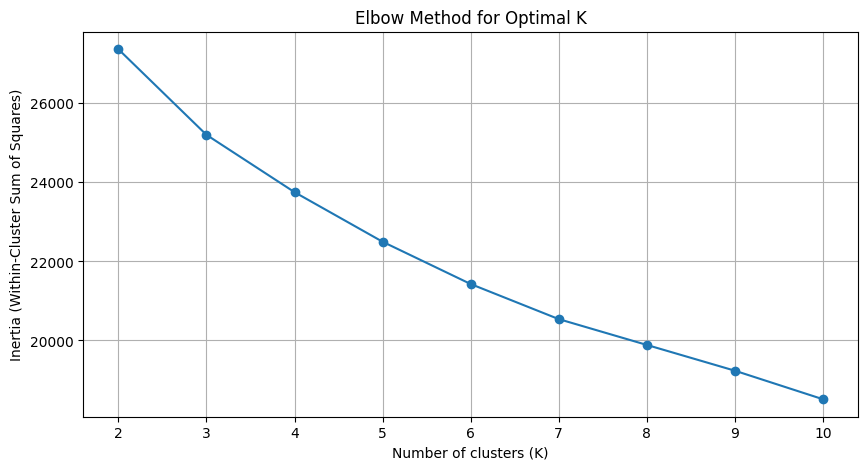

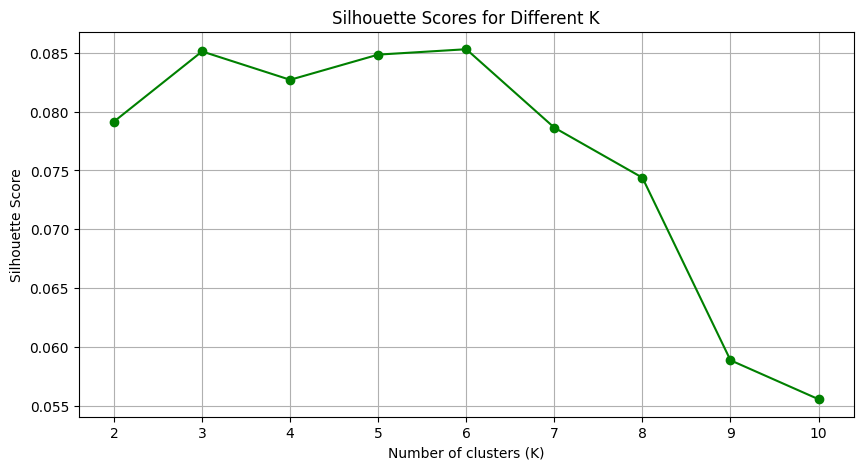

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of K to try
k_range = range(2, 11)  # Try K=2 to K=10

inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    # Silhouette Score
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow (Inertia)
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [16]:
# Step 3.4: Final KMeans Clustering
k_final = 6
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels = kmeans_final.fit_predict(X_pca)

# Assign persona labels to patients
df_master['Persona'] = persona_labels

print(df_master['Persona'].value_counts().sort_index())
df_master[['PATIENT', 'Persona']].head()


Persona
0    24
1    27
2     1
3     4
4    58
5     2
Name: count, dtype: int64


,PATIENT,Persona
0,34a210f9-5ce1-ad63-790f-e404455e3e18,4
1,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,4
2,b1f7b5a9-5cf5-6050-b23c-81027f53bdfd,4
3,1f2aa6c9-41bd-aa05-9da3-e557d8949816,4
4,80e114d1-013b-b546-7aba-17eb360dde04,4


In [17]:
# Reduce PCA for visualization only (2D)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)  # Note: original scaled data, for good spread


In [18]:
from sklearn.cluster import KMeans

k_final = 6
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels = kmeans_final.fit_predict(X_pca)


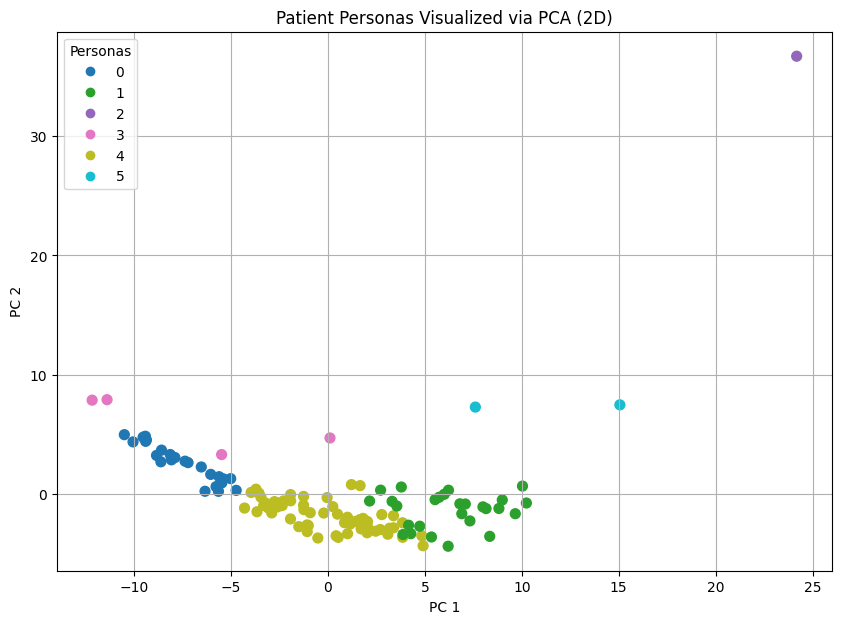

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=persona_labels, cmap='tab10', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D)')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()


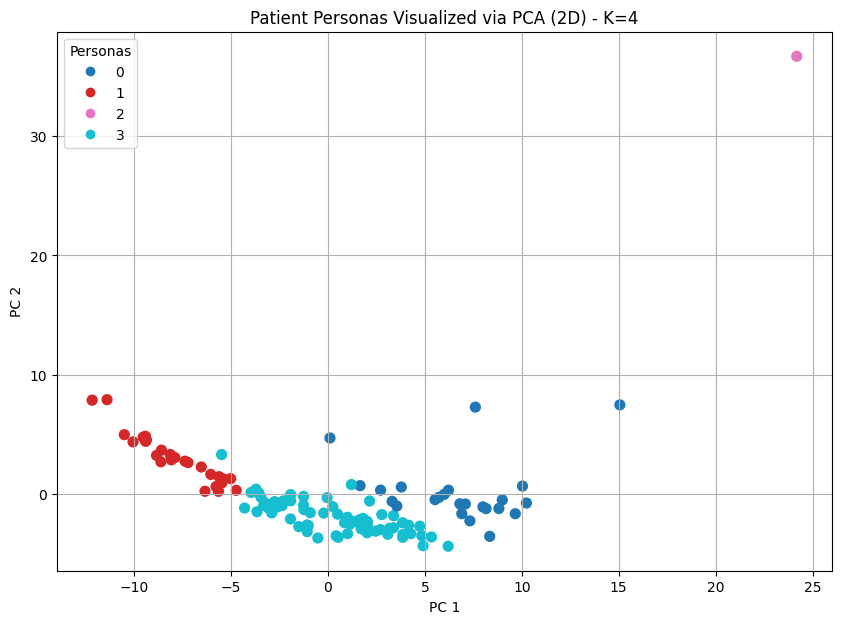

In [20]:
# Step 1: KMeans with K=4
k_final = 4
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels = kmeans_final.fit_predict(X_pca)

# Step 2: Visualize clusters again
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=persona_labels, cmap='tab10', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D) - K=4')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()


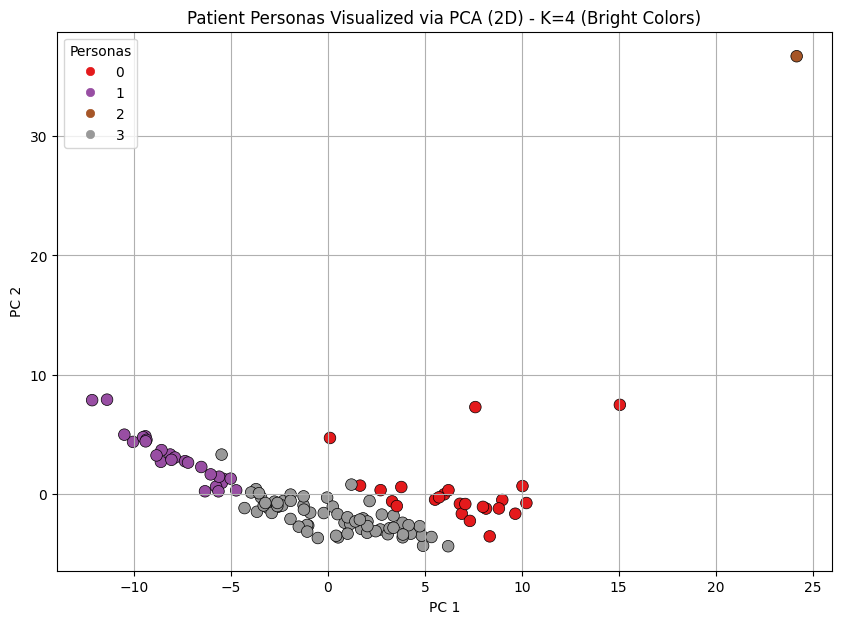

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: KMeans with K=4
k_final = 4
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels = kmeans_final.fit_predict(X_pca)

# Step 2: Visualize clusters again with bright colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=persona_labels, cmap='Set1', s=70, edgecolor='k', linewidth=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D) - K=4 (Bright Colors)')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()


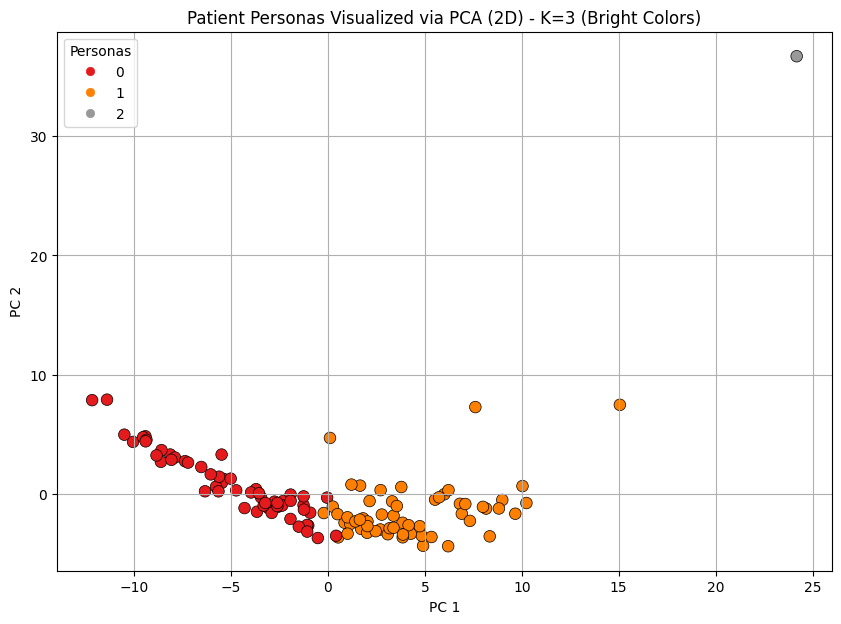

In [22]:
# KMeans with K=3
k_final = 3
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels = kmeans_final.fit_predict(X_pca)

# Visualize again
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=persona_labels, cmap='Set1', s=70, edgecolor='k', linewidth=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D) - K=3 (Bright Colors)')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()


In [23]:
import numpy as np

# Distance from the PCA center (0,0,...)
pca_center = np.zeros(X_pca.shape[1])
distances = np.linalg.norm(X_pca - pca_center, axis=1)

# Set threshold — e.g., top 1% furthest
threshold = np.percentile(distances, 99)  # Top 1% most distant
outlier_mask = distances > threshold

# See how many outliers
print(f"Number of Outliers Detected: {np.sum(outlier_mask)}")


Number of Outliers Detected: 2


In [24]:
# Assuming you have 'outlier_mask' already computed
# Remove the outliers
X_pca_clean = X_pca[~outlier_mask]
X_scaled_clean = X_scaled[~outlier_mask]

# Also remove from original df_master
df_master_clean = df_master[~outlier_mask].reset_index(drop=True)

print(f"Shape after removing outliers: {df_master_clean.shape}")


Shape after removing outliers: (114, 282)


In [25]:
# Safely drop if it exists
if 'index' in df_master_clean.columns:
    df_master_clean = df_master_clean.drop(columns=['index'])

print(f"Shape after dropping 'index': {df_master_clean.shape}")

Shape after dropping 'index': (114, 282)


In [26]:
print(df_master_clean.columns.tolist())


['PATIENT', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME', 'AGE', 'ALIVE', 'MARITAL_D', 'MARITAL_M', 'MARITAL_S', 'MARITAL_W', 'MARITAL_nan', 'RACE_asian', 'RACE_black', 'RACE_other', 'RACE_white', 'RACE_nan', 'ETHNICITY_hispanic', 'ETHNICITY_nonhispanic', 'ETHNICITY_nan', 'GENDER_F', 'GENDER_M', 'GENDER_nan', 'STATE_Massachusetts', 'STATE_nan', 'Abnormal findings diagnostic imaging heart+coronary circulat (finding)', 'Acute bronchitis (disorder)', 'Acute infective cystitis (disorder)', 'Acute viral pharyngitis (disorder)', 'Anemia (disorder)', 'Body mass index 30+ - obesity (finding)', 'Chronic low back pain (finding)', 'Chronic pain (finding)', 'Chronic sinusitis (disorder)', 'Diabetes mellitus type 2 (disorder)', 'Educated to high school level (finding)', 'Essential hypertension (disorder)', 'Fracture of bone (disorder)', 'Fractured dental filling (finding)', 'Full-time employment (finding)', 'Gingival disease (disorder)', 'Gingivitis (disorder)', 'Has a criminal record (fi

In [27]:
# Drop Persona if it exists
if 'Persona' in df_master_clean.columns:
    df_master_clean = df_master_clean.drop(columns=['Persona'])

print(f"Shape after dropping 'Persona': {df_master_clean.shape}")


Shape after dropping 'Persona': (114, 281)


In [28]:
# Drop 'Persona' if it exists
if 'Persona' in df_master_clean.columns:
    df_master_clean = df_master_clean.drop(columns=['Persona'])

# Separate PATIENT IDs for later (don't lose them)
patient_ids = df_master_clean['PATIENT'].copy()

# Drop PATIENT from features
X_clean = df_master_clean.drop(columns=['PATIENT']).copy()

print(f"Shape after cleaning: {X_clean.shape}")  # Should be (114, 280) now


Shape after cleaning: (114, 280)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler_clean = StandardScaler()
X_scaled_clean = scaler_clean.fit_transform(X_clean)
print(f"Shape after scaling: {X_scaled_clean.shape}")


Shape after scaling: (114, 280)


In [30]:
from sklearn.decomposition import PCA
import numpy as np

pca_clean = PCA()
X_pca_clean = pca_clean.fit_transform(X_scaled_clean)

# Find how many PCs for 95% variance
cum_var_clean = np.cumsum(pca_clean.explained_variance_ratio_)
n_components_95_clean = np.argmax(cum_var_clean >= 0.95) + 1

print(f"Number of components to retain 95% variance after outlier removal: {n_components_95_clean}")


Number of components to retain 95% variance after outlier removal: 68


In [31]:
pca_2d_clean = PCA(n_components=2)
X_pca_2d_clean = pca_2d_clean.fit_transform(X_scaled_clean)


In [32]:
from sklearn.cluster import KMeans

k_final = 3
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
persona_labels_clean = kmeans_final.fit_predict(X_pca_clean)

# Assign Personas back to original PATIENT IDs
df_personas = patient_ids.to_frame()
df_personas['Persona'] = persona_labels_clean

print(df_personas['Persona'].value_counts().sort_index())
df_personas.head()


Persona
0    47
1    47
2    20
Name: count, dtype: int64


,PATIENT,Persona
0,34a210f9-5ce1-ad63-790f-e404455e3e18,0
1,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,0
2,b1f7b5a9-5cf5-6050-b23c-81027f53bdfd,0
3,1f2aa6c9-41bd-aa05-9da3-e557d8949816,0
4,80e114d1-013b-b546-7aba-17eb360dde04,0


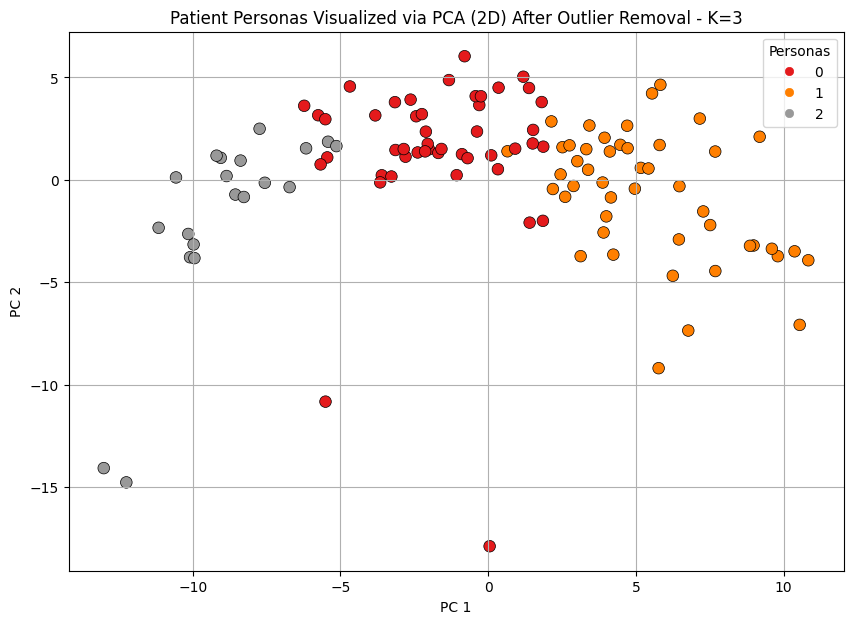

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d_clean[:, 0], X_pca_2d_clean[:, 1], c=persona_labels_clean, cmap='Set1', s=70, edgecolor='k', linewidth=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D) After Outlier Removal - K=3')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()


In [34]:
# New PCA components matrix (full PCA already fitted)
pca_components_clean = pca_clean.components_  # Shape: (280 PCs, 280 features)

# Sum of absolute loadings across all PCs
feature_importance_clean = np.sum(np.abs(pca_components_clean[:n_components_95_clean, :]), axis=0)

# Map back to feature names
feature_names_clean = X_clean.columns  # 280 features
feature_importance_df_clean = pd.DataFrame({
    'feature': feature_names_clean,
    'importance': feature_importance_clean
})

# Sort features by importance
feature_importance_df_clean = feature_importance_df_clean.sort_values(by='importance', ascending=False)

# Top 20 Features
print("🔥 Top 20 Most Important Features After Outlier Removal")
print(feature_importance_df_clean.head(20))

# Bottom 20 Features
print("\n❄️ Bottom 20 Least Important Features After Outlier Removal")
print(feature_importance_df_clean.tail(20))


🔥 Top 20 Most Important Features After Outlier Removal
                                               feature  importance
119  Leukocytes [#/volume] in Blood by Automated count    4.572726
8                                            MARITAL_W    4.523118
120              MCH [Entitic mass] by Automated count    4.493773
55    Only received primary school education (finding)    4.477584
151                             tramadol hydrochloride    4.451827
273               d31fccc3-1767-390d-966a-22a5156f4219    4.439794
72                          Viral sinusitis (disorder)    4.427120
74                            Diastolic Blood Pressure    4.415087
62                 Risk activity involvement (finding)    4.413559
115  Generalized anxiety disorder 7 item (GAD-7) to...    4.321154
36                  Fractured dental filling (finding)    4.319556
73   Pain severity - 0-10 verbal numeric rating [Sc...    4.316209
33             Educated to high school level (finding)    4.307069
70     

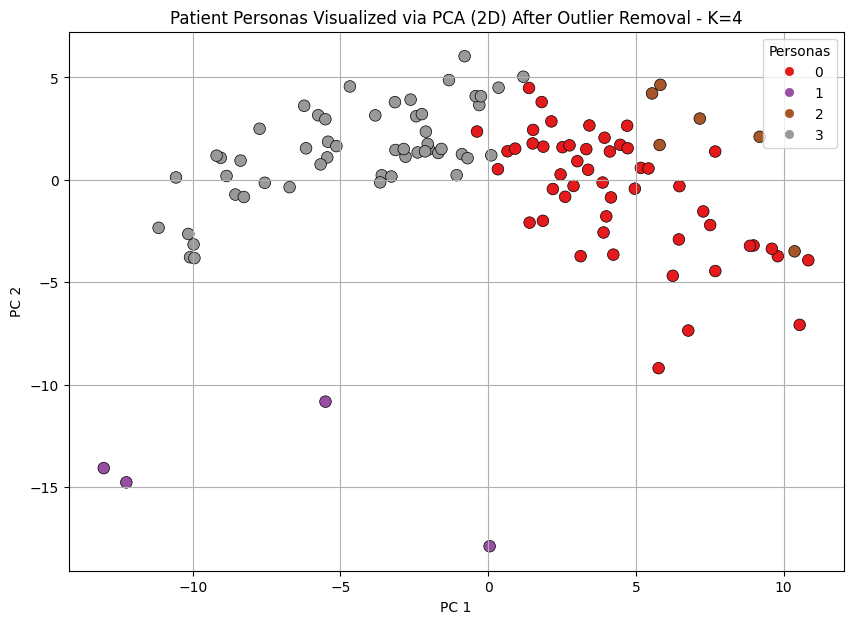

Cluster distribution (K=4): {0: 51, 1: 4, 2: 6, 3: 53}


In [35]:
# KMeans with K=4
k_final_4 = 4
kmeans_final_4 = KMeans(n_clusters=k_final_4, random_state=42, n_init=10)
persona_labels_clean_4 = kmeans_final_4.fit_predict(X_pca_clean)

# Visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d_clean[:, 0], X_pca_2d_clean[:, 1], c=persona_labels_clean_4, cmap='Set1', s=70, edgecolor='k', linewidth=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Patient Personas Visualized via PCA (2D) After Outlier Removal - K=4')
plt.legend(*scatter.legend_elements(), title="Personas")
plt.grid(True)
plt.show()

# Cluster counts
(unique, counts) = np.unique(persona_labels_clean_4, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(f"Cluster distribution (K=4): {cluster_counts}")


In [36]:
# We already have:
# patient_ids -> Patient IDs
# persona_labels_clean -> Cluster labels (0, 1, 2)

# Assign labels to patient dataframe
df_personas = patient_ids.to_frame()
df_personas['Persona'] = persona_labels_clean

# Merge back into cleaned master dataset for full analysis
df_analysis = df_master_clean.copy()
df_analysis['Persona'] = persona_labels_clean

print(df_personas['Persona'].value_counts().sort_index())
df_analysis.head()


Persona
0    47
1    47
2    20
Name: count, dtype: int64


,PATIENT,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,ALIVE,MARITAL_D,MARITAL_M,MARITAL_S,MARITAL_W,...,b046940f-1664-3047-bca7-dfa76be352a4,d18ef2e6-ef40-324c-be54-34a5ee865625,d31fccc3-1767-390d-966a-22a5156f4219,df166300-5a78-3502-a46a-832842197811,e03e23c9-4df1-3eb6-a62d-f70f02301496,PLAN_OWNERSHIP_Guardian,PLAN_OWNERSHIP_Self,PLAN_OWNERSHIP_Spouse,PLAN_OWNERSHIP_Unknown,Persona
0,34a210f9-5ce1-ad63-790f-e404455e3e18,76578.32,15866.26,71625,32,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0fe22cec-1a19-99da-b67f-7ce364c4cf3e,146375.89,544097.84,542941,38,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,b1f7b5a9-5cf5-6050-b23c-81027f53bdfd,173374.13,476542.11,886745,36,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,1f2aa6c9-41bd-aa05-9da3-e557d8949816,76375.47,647647.36,35850,32,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,80e114d1-013b-b546-7aba-17eb360dde04,135954.44,262321.29,149942,26,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [37]:
# Age Profile
age_profile = df_analysis.groupby('Persona')['AGE'].describe()

# Gender Profile
# Assuming you have GENDER_F and GENDER_M one-hot encoded (GENDER_nan can be ignored if present)
gender_profile = df_analysis.groupby('Persona')[['GENDER_F', 'GENDER_M']].mean() * 100  # percentage


In [38]:
# Define key conditions (make sure these features exist)
key_conditions = [
    'Essential hypertension (disorder)',
    'Diabetes mellitus type 2 (disorder)',
    'Hyperlipidemia (disorder)',
    'Chronic pain (finding)',
    'Body mass index (BMI) [Ratio]'
]

condition_profile = df_analysis.groupby('Persona')[key_conditions].mean() * 100  # % of patients with each condition


In [39]:
condition_profile

,Essential hypertension (disorder),Diabetes mellitus type 2 (disorder),Hyperlipidemia (disorder),Chronic pain (finding),Body mass index (BMI) [Ratio]
Persona,,,,,
0,10.638298,0.000000,0.000000,27.659574,2736.102638
1,44.680851,21.276596,40.425532,19.148936,2902.159207
2,0.000000,0.000000,0.000000,15.000000,1774.164939


In [40]:
behavioral_risks = [
    'Unhealthy alcohol drinking behavior (finding)',
    'Stress (finding)',
    'Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]'
]

behavioral_profile = df_analysis.groupby('Persona')[behavioral_risks].mean()
behavioral_profile

,Unhealthy alcohol drinking behavior (finding),Stress (finding),Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]
Persona,,,
0,0.148936,0.93617,3.772991
1,0.255319,1.00000,3.607716
2,0.000000,0.15000,2.032143


In [41]:
social_determinants = [
    'Housing unsatisfactory (finding)',
    'Full-time employment (finding)',
    'Part-time employment (finding)',
    'Unemployed (finding)',
    'Only received primary school education (finding)',
    'Received higher education (finding)'
]

sdoh_profile = df_analysis.groupby('Persona')[social_determinants].mean() * 100
sdoh_profile

,Housing unsatisfactory (finding),Full-time employment (finding),Part-time employment (finding),Unemployed (finding),Only received primary school education (finding),Received higher education (finding)
Persona,,,,,,
0,14.893617,100.00000,65.957447,25.531915,17.021277,68.085106
1,10.638298,97.87234,91.489362,61.702128,14.893617,70.212766
2,5.000000,25.00000,10.000000,10.000000,10.000000,5.000000


In [42]:
# Age Profile
age_profile = df_analysis.groupby('Persona')['AGE'].describe()

# Gender Profile
gender_profile = df_analysis.groupby('Persona')[['GENDER_F', 'GENDER_M']].mean() * 100  # percentage
gender_profile.rename(columns={'GENDER_F': 'Female %', 'GENDER_M': 'Male %'}, inplace=True)

gender_profile


,Female %,Male %
Persona,,
0,57.446809,42.553191
1,48.936170,51.063830
2,45.000000,55.000000


In [43]:
# Key conditions list
key_conditions = [
    'Essential hypertension (disorder)',
    'Diabetes mellitus type 2 (disorder)',
    'Hyperlipidemia (disorder)',
    'Chronic pain (finding)',
    'Body mass index (BMI) [Ratio]'
]

condition_profile = df_analysis.groupby('Persona')[key_conditions].mean() * 100  # %
condition_profile.rename(columns={
    'Essential hypertension (disorder)': 'Hypertension %',
    'Diabetes mellitus type 2 (disorder)': 'Diabetes %',
    'Hyperlipidemia (disorder)': 'Hyperlipidemia %',
    'Chronic pain (finding)': 'Chronic Pain %',
    'Body mass index (BMI) [Ratio]': 'Avg BMI'
}, inplace=True)


condition_profile

,Hypertension %,Diabetes %,Hyperlipidemia %,Chronic Pain %,Avg BMI
Persona,,,,,
0,10.638298,0.000000,0.000000,27.659574,2736.102638
1,44.680851,21.276596,40.425532,19.148936,2902.159207
2,0.000000,0.000000,0.000000,15.000000,1774.164939


In [44]:
behavioral_risks = [
    'Unhealthy alcohol drinking behavior (finding)',
    'Stress (finding)',
    'Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]'
]

behavioral_profile = df_analysis.groupby('Persona')[behavioral_risks].mean()
behavioral_profile.rename(columns={
    'Unhealthy alcohol drinking behavior (finding)': 'Alcohol Risk %',
    'Stress (finding)': 'Stress %',
    'Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]': 'Avg Anxiety Score (GAD-7)'
}, inplace=True)
behavioral_profile *= 100  # scale % for Alcohol and Stress

behavioral_profile


,Alcohol Risk %,Stress %,Avg Anxiety Score (GAD-7)
Persona,,,
0,14.893617,93.617021,377.299054
1,25.531915,100.000000,360.771569
2,0.000000,15.000000,203.214286


In [45]:
social_determinants = [
    'Housing unsatisfactory (finding)',
    'Full-time employment (finding)',
    'Part-time employment (finding)',
    'Unemployed (finding)',
    'Only received primary school education (finding)',
    'Received higher education (finding)'
]

sdoh_profile = df_analysis.groupby('Persona')[social_determinants].mean() * 100
sdoh_profile.rename(columns={
    'Housing unsatisfactory (finding)': 'Bad Housing %',
    'Full-time employment (finding)': 'Full-Time Employed %',
    'Part-time employment (finding)': 'Part-Time Employed %',
    'Unemployed (finding)': 'Unemployed %',
    'Only received primary school education (finding)': 'Low Education %',
    'Received higher education (finding)': 'Higher Education %'
}, inplace=True)


sdoh_profile

,Bad Housing %,Full-Time Employed %,Part-Time Employed %,Unemployed %,Low Education %,Higher Education %
Persona,,,,,,
0,14.893617,100.00000,65.957447,25.531915,17.021277,68.085106
1,10.638298,97.87234,91.489362,61.702128,14.893617,70.212766
2,5.000000,25.00000,10.000000,10.000000,10.000000,5.000000


In [46]:
# Combine into one profile table
persona_profile = pd.concat([
    age_profile[['count', 'mean', '50%']],  # count, mean age, median age
    gender_profile,
    condition_profile,
    behavioral_profile,
    sdoh_profile
], axis=1)

# Clean display
persona_profile.columns = [
    'Patients', 'Avg Age', 'Median Age',
    'Female %', 'Male %',
    'Hypertension %', 'Diabetes %', 'Hyperlipidemia %', 'Chronic Pain %', 'Avg BMI',
    'Alcohol Risk %', 'Stress %', 'Avg Anxiety Score (GAD-7)',
    'Bad Housing %', 'Full-Time Employed %', 'Part-Time Employed %', 'Unemployed %',
    'Low Education %', 'Higher Education %'
]

persona_profile.round(2)




,Patients,Avg Age,Median Age,Female %,Male %,Hypertension %,Diabetes %,Hyperlipidemia %,Chronic Pain %,Avg BMI,Alcohol Risk %,Stress %,Avg Anxiety Score (GAD-7),Bad Housing %,Full-Time Employed %,Part-Time Employed %,Unemployed %,Low Education %,Higher Education %
Persona,,,,,,,,,,,,,,,,,,,
0,47.0,40.68,39.0,57.45,42.55,10.64,0.00,0.00,27.66,2736.10,14.89,93.62,377.30,14.89,100.00,65.96,25.53,17.02,68.09
1,47.0,71.23,69.0,48.94,51.06,44.68,21.28,40.43,19.15,2902.16,25.53,100.00,360.77,10.64,97.87,91.49,61.70,14.89,70.21
2,20.0,15.10,17.0,45.00,55.00,0.00,0.00,0.00,15.00,1774.16,0.00,15.00,203.21,5.00,25.00,10.00,10.00,10.00,5.00


C:\Users\karan\AppData\Local\Temp\ipykernel_22288\4107109696.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radar_data['Avg Age'] = radar_data['Avg Age'] / 100 * 100


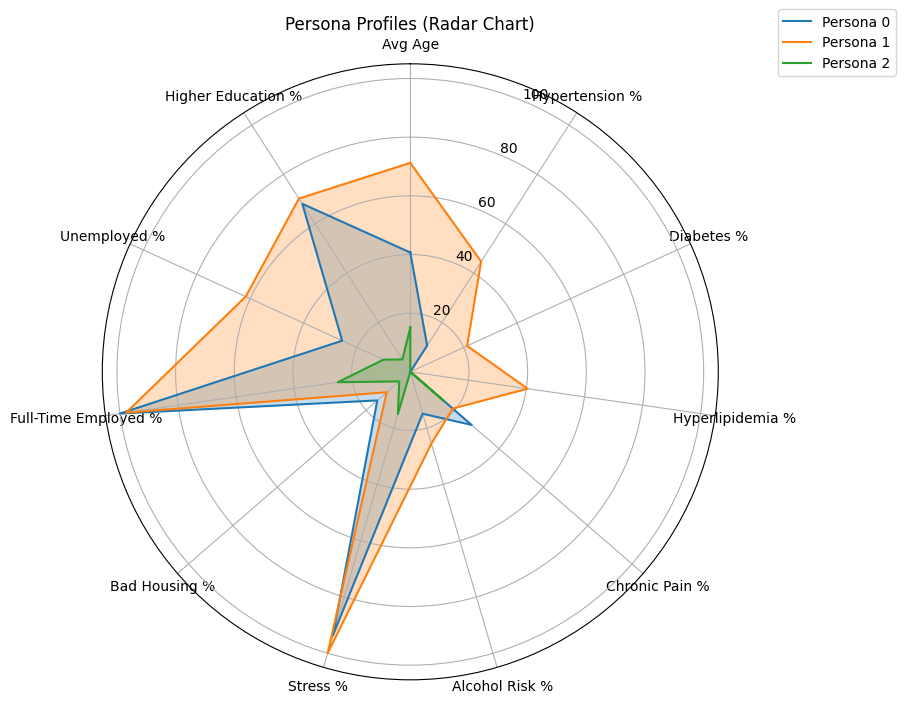

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Focus on key attributes (scale properly: 0–100%)
features_for_radar = [
    'Avg Age', 'Hypertension %', 'Diabetes %', 'Hyperlipidemia %', 
    'Chronic Pain %', 'Alcohol Risk %', 'Stress %', 'Bad Housing %', 
    'Full-Time Employed %', 'Unemployed %', 'Higher Education %'
]

# Prepare data
radar_data = persona_profile[features_for_radar]

# Normalize Age (scale age to 0-100 based on range 0-100 years)
radar_data['Avg Age'] = radar_data['Avg Age'] / 100 * 100

# Radar Chart Setup
labels = radar_data.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each Persona
for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]  # complete the circle
    ax.plot(angles, values, label=f'Persona {idx}')
    ax.fill(angles, values, alpha=0.25)

# Aesthetics
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Persona Profiles (Radar Chart)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


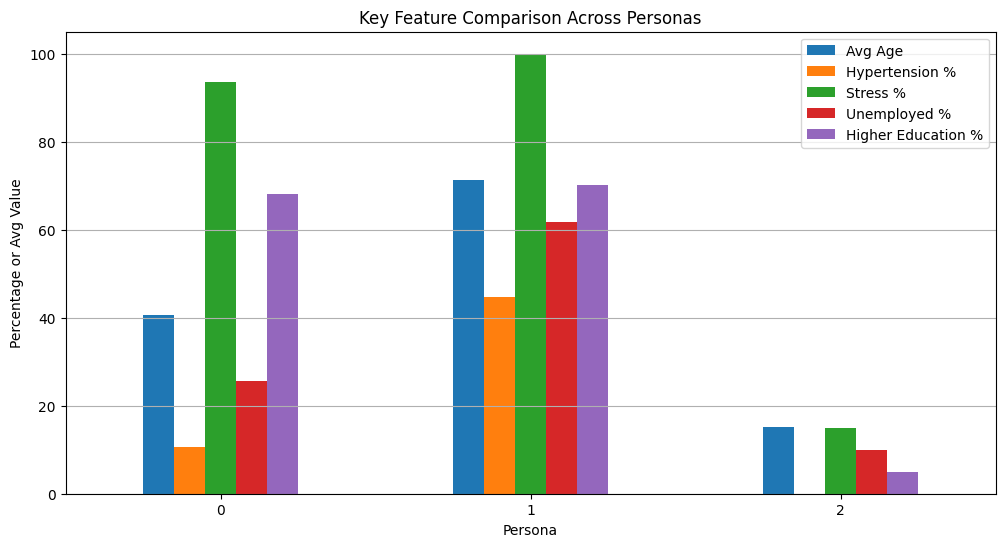

In [48]:
# Bar Plot for Key Metrics
key_metrics = ['Avg Age', 'Hypertension %', 'Stress %', 'Unemployed %', 'Higher Education %']

persona_profile[key_metrics].plot(kind='bar', figsize=(12, 6))
plt.title('Key Feature Comparison Across Personas')
plt.ylabel('Percentage or Avg Value')
plt.xlabel('Persona')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()


In [ ]:
df_master_clean.shape 

(114, 281)

In [52]:
df_master_clean.to_csv("df_master_cleaned.csv", index=False)